In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('books.csv')
df.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [6]:
df.columns

Index(['Id', 'Name', 'RatingDist1', 'pagesNumber', 'RatingDist4',
       'RatingDistTotal', 'PublishMonth', 'PublishDay', 'Publisher',
       'CountsOfReview', 'PublishYear', 'Language', 'Authors', 'Rating',
       'RatingDist2', 'RatingDist5', 'ISBN', 'RatingDist3'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58292 entries, 0 to 58291
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               58292 non-null  int64  
 1   Name             58292 non-null  object 
 2   RatingDist1      58292 non-null  object 
 3   pagesNumber      58292 non-null  int64  
 4   RatingDist4      58292 non-null  object 
 5   RatingDistTotal  58292 non-null  object 
 6   PublishMonth     58292 non-null  int64  
 7   PublishDay       58292 non-null  int64  
 8   Publisher        57798 non-null  object 
 9   CountsOfReview   58292 non-null  int64  
 10  PublishYear      58292 non-null  int64  
 11  Language         20294 non-null  object 
 12  Authors          58292 non-null  object 
 13  Rating           58292 non-null  float64
 14  RatingDist2      58292 non-null  object 
 15  RatingDist5      58292 non-null  object 
 16  ISBN             57746 non-null  object 
 17  RatingDist3 

In [8]:
df.isnull().sum()

Id                     0
Name                   0
RatingDist1            0
pagesNumber            0
RatingDist4            0
RatingDistTotal        0
PublishMonth           0
PublishDay             0
Publisher            494
CountsOfReview         0
PublishYear            0
Language           37998
Authors                0
Rating                 0
RatingDist2            0
RatingDist5            0
ISBN                 546
RatingDist3            0
dtype: int64

In [9]:
df = df.drop('Language', axis=1)
df.isnull().sum()

Id                   0
Name                 0
RatingDist1          0
pagesNumber          0
RatingDist4          0
RatingDistTotal      0
PublishMonth         0
PublishDay           0
Publisher          494
CountsOfReview       0
PublishYear          0
Authors              0
Rating               0
RatingDist2          0
RatingDist5          0
ISBN               546
RatingDist3          0
dtype: int64

In [10]:
df.dtypes

Id                   int64
Name                object
RatingDist1         object
pagesNumber          int64
RatingDist4         object
RatingDistTotal     object
PublishMonth         int64
PublishDay           int64
Publisher           object
CountsOfReview       int64
PublishYear          int64
Authors             object
Rating             float64
RatingDist2         object
RatingDist5         object
ISBN                object
RatingDist3         object
dtype: object

In [11]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'most_frequent')

In [12]:
cols = ['Publisher', 'ISBN']

for x in cols:
  df[x] = si.fit_transform(df[[x]])

df.isnull().sum()

Id                 0
Name               0
RatingDist1        0
pagesNumber        0
RatingDist4        0
RatingDistTotal    0
PublishMonth       0
PublishDay         0
Publisher          0
CountsOfReview     0
PublishYear        0
Authors            0
Rating             0
RatingDist2        0
RatingDist5        0
ISBN               0
RatingDist3        0
dtype: int64

In [13]:
df.drop('Id', axis=1, inplace = True)
df.head()

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,J.K. Rowling,4.57,2:25317,5:1546466,006053818X,3:159960
1,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,J.K. Rowling,4.47,2:130310,5:4268227,006053818X,3:567458
3,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [14]:
df.columns

Index(['Name', 'RatingDist1', 'pagesNumber', 'RatingDist4', 'RatingDistTotal',
       'PublishMonth', 'PublishDay', 'Publisher', 'CountsOfReview',
       'PublishYear', 'Authors', 'Rating', 'RatingDist2', 'RatingDist5',
       'ISBN', 'RatingDist3'],
      dtype='object')

In [15]:
def get_total(x):
  y = x.split(':')
  val = y[1]

  return int(val)


get_total('1:10128')

10128

In [16]:
df['RatingDist1'] = df['RatingDist1'].apply(get_total)
df['RatingDist2'] = df['RatingDist2'].apply(get_total)
df['RatingDist3'] = df['RatingDist3'].apply(get_total)
df['RatingDist4'] = df['RatingDist4'].apply(get_total)
df['RatingDist5'] = df['RatingDist5'].apply(get_total)

df.head()

,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,Harry Potter and the Half-Blood Prince (Harry ...,9896,652,556485,total:2298124,16,9,Scholastic Inc.,28062,2006,J.K. Rowling,4.57,25317,1546466,006053818X,159960
1,Harry Potter and the Order of the Phoenix (Har...,12455,870,604283,total:2358637,1,9,Scholastic Inc.,29770,2004,J.K. Rowling,4.50,37005,1493113,0439358078,211781
2,Harry Potter and the Sorcerer's Stone (Harry P...,108202,309,1513191,total:6587388,1,11,Scholastic Inc,75911,2003,J.K. Rowling,4.47,130310,4268227,006053818X,567458
3,Harry Potter and the Chamber of Secrets (Harry...,11896,352,706082,total:2560657,1,11,Scholastic,244,2003,J.K. Rowling,4.42,49353,1504505,0439554896,288821
4,Harry Potter and the Prisoner of Azkaban (Harr...,10128,435,630534,total:2610317,1,5,Scholastic Inc.,37093,2004,J.K. Rowling,4.57,24849,1749958,043965548X,194848


In [17]:
selected_features = df[['Rating', 'pagesNumber', 'PublishYear', 'RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5', 'Authors', 'Publisher', 'CountsOfReview']]


In [18]:
selected_features.head()

,Rating,pagesNumber,PublishYear,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,Authors,Publisher,CountsOfReview
0,4.57,652,2006,9896,25317,159960,556485,1546466,J.K. Rowling,Scholastic Inc.,28062
1,4.50,870,2004,12455,37005,211781,604283,1493113,J.K. Rowling,Scholastic Inc.,29770
2,4.47,309,2003,108202,130310,567458,1513191,4268227,J.K. Rowling,Scholastic Inc,75911
3,4.42,352,2003,11896,49353,288821,706082,1504505,J.K. Rowling,Scholastic,244
4,4.57,435,2004,10128,24849,194848,630534,1749958,J.K. Rowling,Scholastic Inc.,37093


In [19]:
df['Authors'].unique()

array(['J.K. Rowling', 'W. Frederick Zimmerman', 'Douglas Adams', ...,
       'Jonathan Weiner', 'Archibald Hamilton Rutledge',
       "Daniel O'Connor"], dtype=object)

In [20]:
df['Publisher'].unique()

array(['Scholastic Inc.', 'Scholastic Inc', 'Scholastic', ..., 'Twelve',
       'Fantastic Audio', 'Gray & Company Publishers'], dtype=object)

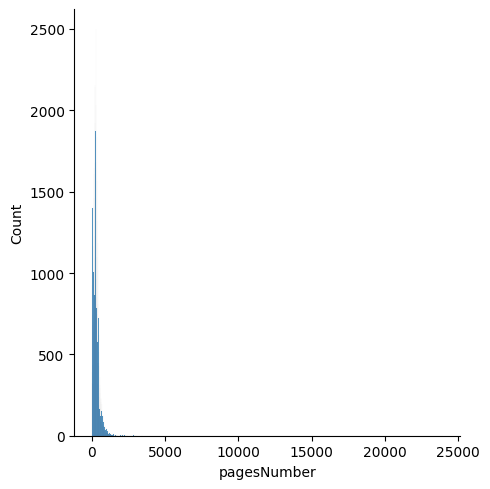

In [21]:
sns.displot(df['pagesNumber'])

In [22]:
df['pagesNumber'].describe()

count    58292.000000
mean       293.918428
std        247.791794
min          0.000000
25%        168.000000
50%        256.000000
75%        368.000000
max      23931.000000
Name: pagesNumber, dtype: float64

In [23]:
selected_features.columns

Index(['Rating', 'pagesNumber', 'PublishYear', 'RatingDist1', 'RatingDist2',
       'RatingDist3', 'RatingDist4', 'RatingDist5', 'Authors', 'Publisher',
       'CountsOfReview'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le1 = LabelEncoder()

selected_features['Authors'] = le1.fit_transform(selected_features['Authors'])

le2 = LabelEncoder()

selected_features['Publisher'] = le2.fit_transform(selected_features['Publisher'])

selected_features.head()

<ipython-input-25-736546c0d608>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Authors'] = le1.fit_transform(selected_features['Authors'])
<ipython-input-25-736546c0d608>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Publisher'] = le2.fit_transform(selected_features['Publisher'])


,Rating,pagesNumber,PublishYear,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,Authors,Publisher,CountsOfReview
0,4.57,652,2006,9896,25317,159960,556485,1546466,11025,5876,28062
1,4.50,870,2004,12455,37005,211781,604283,1493113,11025,5876,29770
2,4.47,309,2003,108202,130310,567458,1513191,4268227,11025,5875,75911
3,4.42,352,2003,11896,49353,288821,706082,1504505,11025,5871,244
4,4.57,435,2004,10128,24849,194848,630534,1749958,11025,5876,37093


In [26]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
selected_features_normalized = scaler.fit_transform(selected_features)

In [27]:
k = 5
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')
knn_model.fit(selected_features_normalized)

NearestNeighbors(metric='cosine')

In [36]:
def get_recommendations(book_name):
    book_index = df.loc[df['Name'] == book_name].index[0]
    distances, indices = knn_model.kneighbors([selected_features_normalized[book_index]])

    recommended_indices = indices.flatten()

    print("Recommendations for '{}':".format(df['Name'].iloc[book_index]))
    for i, index in enumerate(recommended_indices):
        if i == 0:
            continue
        print("- {}".format(df['Name'].iloc[index]))

In [37]:
book_name = 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)'
get_recommendations(book_name)

Recommendations for 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)':
- Harry Potter and the Goblet of Fire (Harry Potter, #4)
- Harry Potter and the Half-Blood Prince (Harry Potter, #6)
- Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
- Harry Potter and the Sorcerer's Stone (Harry Potter, #1)


In [39]:
df['Name']

0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Sorcerer's Stone (Harry P...
3        Harry Potter and the Chamber of Secrets (Harry...
4        Harry Potter and the Prisoner of Azkaban (Harr...
                               ...                        
58287    The Best American Science and Nature Writing 2000
58288    The Best American Science and Nature Writing 2002
58289    Hunting and Home in the Southern Heartland: Th...
58290               The Best American Science Writing 2004
58291                   The Best American Sex Writing 2004
Name: Name, Length: 58292, dtype: object

In [40]:
get_recommendations('The Best American Science and Nature Writing 2002')

Recommendations for 'The Best American Science and Nature Writing 2002':
- Schaum's Outline of Computer Architecture
- Corpse Candle (Hugh Corbett, #13)
- Living with Music: Jazz Writings
- Porsche 911: Perfection by Design
